# Random Graphs

In [140]:
using Plots
using LightGraphs
using Statistics: mean
using Combinatorics: combinations

## Average Properties of random graphs

In [124]:
N = 1000
nodes = 1:N
# Maximum number of connections
M = N * (N - 1) / 2
p = 0.001

0.001

In [125]:
"""
Simulate an Erdos-Reyni model A     
"""
function er_model_a(N, p)
    nodes = 1:N
    G = SimpleGraph(N)
    for (n1, n2) in combinations(nodes, 2)
        if p > rand()
            add_edge!(G, n1, n2)
        end
    end
    return G
end

er_model_a

In [151]:
p_values = [0.0001, 0.0005, 0.001, 0.005, 0.01]
k_values = 0:0.05:5
nk_values = length(k_values)
n_sims = 10
Q_values = zeros(nk_values, n_sims)
for (ix, k) in enumerate(k_values)
    print("@value $ix/$nk_values\r")
    p = k / N
    for nsim=1:n_sims
        G = er_model_a(N, p)
        components = connected_components(G)
        vmax,idmax = findmax([length(component) for component in components])
        # Property
        Q_samp = vmax / N
        Q_values[ix, nsim] = Q_samp
    end
end

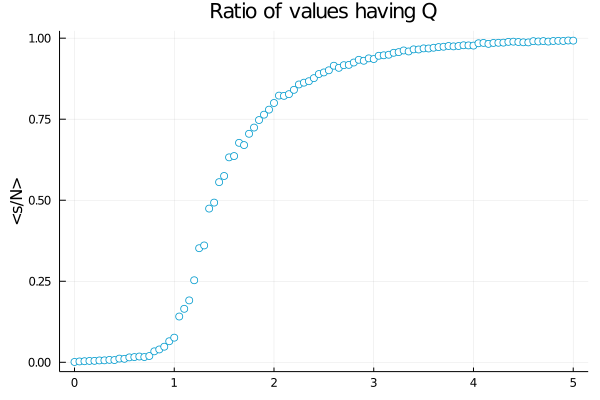

In [153]:
scatter(k_values, mean(Q_values, dims=2), label=nothing, markercolor=:white, markerstrokecolor=:deepskyblue3)
plot!(title="Ratio of values having Q", ylabel="<s/N>")